# Applying SOM and ANN for Fraud Detection

In this project, the self-organizing map (SOM) method is applied to the credit card application dataset to detect the fraud between the banks' customers and then artificial nerual network (ANN) is applied  to predict the probability that each customer cheated or not. Thus the unsuprevised learning (SOM and supervised learning (ANN) methods should be combined. The dataset used here is obtained from "Deep Learning A-Z 2023: Neural Networks, AI & ChatGPT Prize" course. This project includes three parts:

*  Part 1: Implementing SOM to detect the fraud flag
*  Part 2: Going from Unsupervised to Supervised Deep Learning by using fraud flag as target
*  Part 3: Implementing ANN to estimate the probability of fraud for each customer


## Part 1 - SOM

Install MiniSom Package for implementing the SOM

In [0]:
!pip install MiniSom

## Importing the libraries


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [7]:
dataset = pd.read_csv('C:\homa\python\Self-Organizing-Maps\Self_Organizing_Maps\Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [9]:
np.shape(X)

(690, 15)

In [8]:
dataset.head()
# class flag determines whether customer was approved for cridit card or not. we are intersted in those that are approved

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


## Feature Scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

# Training the SOM
Our dataset has 15 features.
As a first step we should select the map(grid) size which is equvalent to the number of neurons in this case our map is 10 by 10, meaning the number of neurons is 100. 
As a second step, we assign a weight vector of length 15 (for each feature) to each node. These weight vectors are randomly initialized by small numbers close to zeros.
In a third step, a random point from the dataset is selected and its euclidian distance to the weight vectors are calculated. the node that has minimum distance is called  winning node.
In fourth step, the weight for this node and a neighberhood of this node are updated so that their weights move closer to the selected point.
 The above steps are repeated one by one for the remaining data points and the whole process would be repeated again for all data points by shrinking the neiber size until the neibourhood size can not be reduced anymore.




In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizing the results
After finding the SOM weights as explained above we create a Mean Interneuron Distance (MID) map from them. MID map is defined for each node by calculating its mean distance of the weight for that node from the weights of its neighbouring nodes in a define neighborhood ridus. This ditance is visualized by color coding the distance values for each node. The brighter colors mean means higher MID distance and vice-versa. 

 The higher MID represents the outlier node which hrlps us to uidentify the cheaters by checking the cutomers assign to that node. 
 we are intersted in customers that their credit card applications are approved. Therefore we add circular and rectangular  markers to the MID map to distinguish them.  The green rectangular and red circle are going to correspond to the customers who did and did not get approval from the bank respectively.  


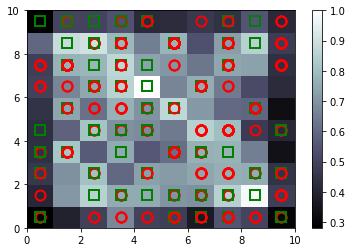

In [8]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [9]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4,6)], mappings[(8,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [10]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15757467
15815443
15748432
15696287
15698749
15773776
15791769
15571121
15660390
15577515
15598802
15657778
15652658
15624595
15688264
15720644
15746258
15644878
15671987
15700511


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [11]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [12]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

#Part 3 - ANN

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [14]:
import tensorflow as tf
tf.__version__

'2.12.0'

## Initializing the ANN

In [15]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [17]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [18]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [19]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 830us/step - loss: 0.6358 - accuracy: 0.7029
Epoch 2/10
690/690 [==============================] - 1s 827us/step - loss: 0.3053 - accuracy: 0.9217
Epoch 3/10
690/690 [==============================] - 1s 832us/step - loss: 0.1954 - accuracy: 0.9681
Epoch 4/10
690/690 [==============================] - 1s 848us/step - loss: 0.1468 - accuracy: 0.9681
Epoch 5/10
690/690 [==============================] - 1s 843us/step - loss: 0.1215 - accuracy: 0.9710
Epoch 6/10
690/690 [==============================] - 1s 862us/step - loss: 0.1073 - accuracy: 0.9710
Epoch 7/10
690/690 [==============================] - 1s 831us/step - loss: 0.0974 - accuracy: 0.9710
Epoch 8/10
690/690 [==============================] - 1s 833us/step - loss: 0.0903 - accuracy: 0.9710
Epoch 9/10
690/690 [==============================] - 1s 788us/step - loss: 0.0849 - accuracy: 0.9710
Epoch 10/10
690/690 [==============================] - 1s 782us/step - loss: 0.081

## Predicting test set results

In [20]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 809us/step


In [21]:
print(y_pred)

[[1.56430560e+07 3.59383023e-07]
 [1.57225350e+07 8.17731234e-07]
 [1.56036830e+07 9.35753974e-07]
 ...
 [1.56420980e+07 1.78323239e-01]
 [1.56448780e+07 1.85238972e-01]
 [1.55988020e+07 3.38078439e-01]]


In [22]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15757467
15815443
15748432
15696287
15698749
15773776
15791769
15571121
15660390
15577515
15598802
15657778
15652658
15624595
15688264
15720644
15746258
15644878
15671987
15700511


In [26]:
y_pred = ann.predict(customers)

22/22 [==============================] - 0s 809us/step


# Estimating the probability of each customer and  creating a dataframe  based on the ID of the customer and the probability of the customer being a fraudster

In [30]:
d = {'CustomerID': dataset.iloc[:, 0:1].values.reshape((1,-1))[0], 'prob': y_pred.reshape((1,-1))[0]}
df = pd.DataFrame(data=d)

In [23]:
df.head()

,CustomerID,prob
0,15776156,0.002739
1,15739548,0.001040
2,15662854,0.031466
3,15687688,0.003103
4,15715750,0.000879
